In [6]:
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please ensure you have installed TensorFlow correctly')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 2.8.0
Default GPU Device: /device:GPU:0


/var/folders/4w/k6c16td51cv9ytcmnnvx3mpw0000gn/T/ipykernel_34895/2432987752.py:6: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
2022-04-24 21:58:21.585322: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-24 21:58:21.585363: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-04-24 21:58:21.585543: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may

In [1]:
# show images inline
%matplotlib inline

# automatically reload modules when they have changed
%load_ext autoreload
%autoreload 2

# import keras
from tensorflow import keras

# import keras_retinanet
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color
from keras_retinanet.utils.gpu import setup_gpu

# import miscellaneous modules
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import time


# Load RetinaNet model

In [2]:
# adjust this to point to your downloaded/trained model
# models can be downloaded here: https://github.com/fizyr/keras-retinanet/releases
model_path = os.path.join('keras-retinanet', 'snapshots', 'resnet50_csv_50.h5')

# load retinanet model
model = models.load_model(model_path, backbone_name='resnet50')

# if the model is not converted to an inference model, use the line below
# see: https://github.com/fizyr/keras-retinanet#converting-a-training-model-to-inference-model
model = models.convert_model(model)

print(model.summary())

Metal device set to: Apple M1


2022-04-24 21:49:04.541013: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-24 21:49:04.541118: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "retinanet-bbox"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1 (Conv2D)                 (None, None, None,   9408        ['input_1[0][0]']                
                                64)                                                               
                                                                                                  
 bn_conv1 (BatchNormalization)  (None, None, None,   256         ['conv1[0][0]']                  
                                64)                                                  

                                                                                                  
 res2b (Add)                    (None, None, None,   0           ['bn2b_branch2c[0][0]',          
                                256)                              'res2a_relu[0][0]']             
                                                                                                  
 res2b_relu (Activation)        (None, None, None,   0           ['res2b[0][0]']                  
                                256)                                                              
                                                                                                  
 res2c_branch2a (Conv2D)        (None, None, None,   16384       ['res2b_relu[0][0]']             
                                64)                                                               
                                                                                                  
 bn2c_bran

 ion)                           128)                                                              
                                                                                                  
 res3b_branch2a_relu (Activatio  (None, None, None,   0          ['bn3b_branch2a[0][0]']          
 n)                             128)                                                              
                                                                                                  
 padding3b_branch2b (ZeroPaddin  (None, None, None,   0          ['res3b_branch2a_relu[0][0]']    
 g2D)                           128)                                                              
                                                                                                  
 res3b_branch2b (Conv2D)        (None, None, None,   147456      ['padding3b_branch2b[0][0]']     
                                128)                                                              
          

 res3d_branch2c (Conv2D)        (None, None, None,   65536       ['res3d_branch2b_relu[0][0]']    
                                512)                                                              
                                                                                                  
 bn3d_branch2c (BatchNormalizat  (None, None, None,   2048       ['res3d_branch2c[0][0]']         
 ion)                           512)                                                              
                                                                                                  
 res3d (Add)                    (None, None, None,   0           ['bn3d_branch2c[0][0]',          
                                512)                              'res3c_relu[0][0]']             
                                                                                                  
 res3d_relu (Activation)        (None, None, None,   0           ['res3d[0][0]']                  
          

                                                                                                  
 res4c_branch2a (Conv2D)        (None, None, None,   262144      ['res4b_relu[0][0]']             
                                256)                                                              
                                                                                                  
 bn4c_branch2a (BatchNormalizat  (None, None, None,   1024       ['res4c_branch2a[0][0]']         
 ion)                           256)                                                              
                                                                                                  
 res4c_branch2a_relu (Activatio  (None, None, None,   0          ['bn4c_branch2a[0][0]']          
 n)                             256)                                                              
                                                                                                  
 padding4c

 ion)                           256)                                                              
                                                                                                  
 res4e_branch2b_relu (Activatio  (None, None, None,   0          ['bn4e_branch2b[0][0]']          
 n)                             256)                                                              
                                                                                                  
 res4e_branch2c (Conv2D)        (None, None, None,   262144      ['res4e_branch2b_relu[0][0]']    
                                1024)                                                             
                                                                                                  
 bn4e_branch2c (BatchNormalizat  (None, None, None,   4096       ['res4e_branch2c[0][0]']         
 ion)                           1024)                                                             
          

 res5a (Add)                    (None, None, None,   0           ['bn5a_branch2c[0][0]',          
                                2048)                             'bn5a_branch1[0][0]']           
                                                                                                  
 res5a_relu (Activation)        (None, None, None,   0           ['res5a[0][0]']                  
                                2048)                                                             
                                                                                                  
 res5b_branch2a (Conv2D)        (None, None, None,   1048576     ['res5a_relu[0][0]']             
                                512)                                                              
                                                                                                  
 bn5b_branch2a (BatchNormalizat  (None, None, None,   2048       ['res5b_branch2a[0][0]']         
 ion)     

                                                                                                  
 P4_upsampled (UpsampleLike)    (None, None, None,   0           ['P4_merged[0][0]',              
                                256)                              'res3d_relu[0][0]']             
                                                                                                  
 C3_reduced (Conv2D)            (None, None, None,   131328      ['res3d_relu[0][0]']             
                                256)                                                              
                                                                                                  
 P6 (Conv2D)                    (None, None, None,   4718848     ['res5c_relu[0][0]']             
                                256)                                                              
                                                                                                  
 P3_merged

In [3]:
import pandas as pd 

# Read csv file with classes
labels_to_names = pd.read_csv('classes.csv', header=None).T.loc[0].to_dict()
print(f'The labels are {labels_to_names}')

# Read csv file with test instances
test_df = pd.read_csv("annotations_test.csv")
test_df.head()

The labels are {0: 'left', 1: 'right'}


images/149.png   71  127  121  193  left
0   images/57.png   35   33  213  196  left
1   images/49.png   16   15  201  224  left
2   images/84.png   68   17  224  172  left
3  images/198.png   89   52  148  131  left
4  images/203.png  144   80  206  158  left

# Run detection on example

2022-04-24 21:49:07.783429: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-04-24 21:49:07.784576: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


processing time:  1.3031418323516846


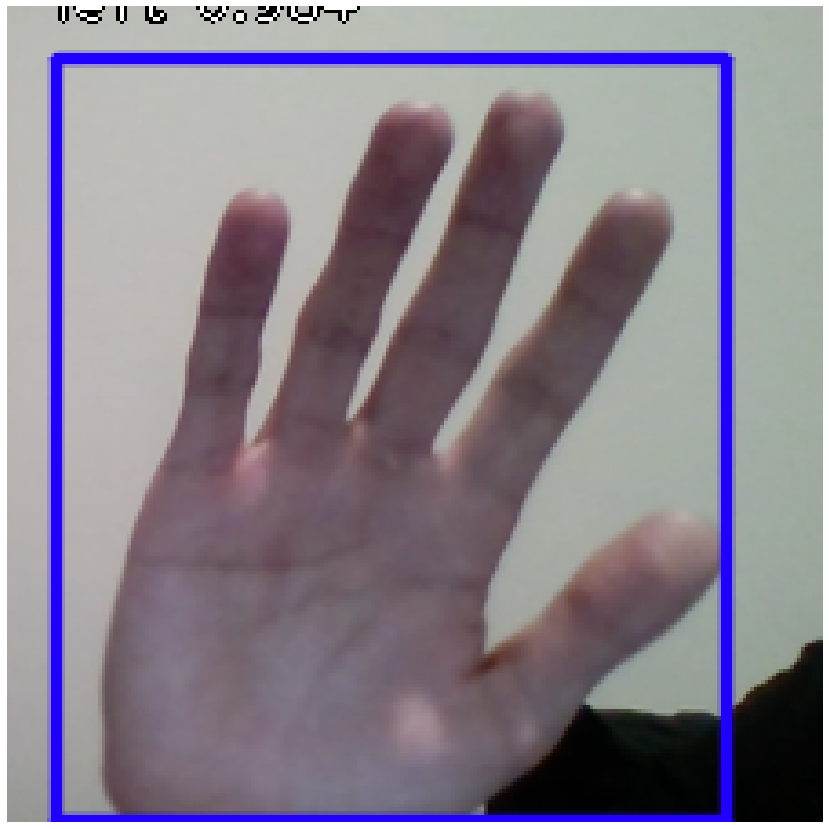

In [4]:
# load image
image = read_image_bgr(test_df.iloc[1,0])

# copy to draw on
draw = image.copy()
draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

# preprocess image for network
image = preprocess_image(image)
image, scale = resize_image(image)

# process image
start = time.time()
#print(model.predict_on_batch(np.expand_dims(image, axis=0)))
boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))
print("processing time: ", time.time() - start)

# correct for image scale
boxes /= scale

# visualize detections
for box, score, label in zip(boxes[0], scores[0], labels[0]):
    # scores are sorted so we can break
    if score < 0.5:
        break
        
    color = label_color(label)
    
    b = box.astype(int)
    draw_box(draw, b, color=color)
    
    caption = "{} {:.3f}".format(labels_to_names[label], score)
    draw_caption(draw, b, caption)
    
plt.figure(figsize=(15, 15))
plt.axis('off')
plt.imshow(draw)
plt.show()

# Run test set

processing time:  0.22971796989440918


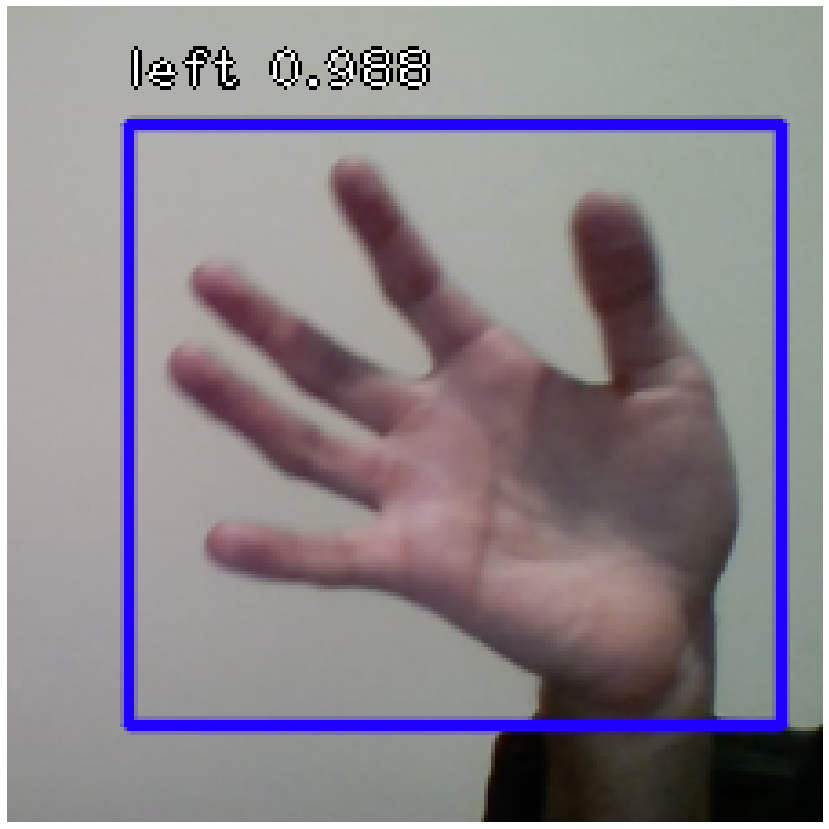

processing time:  0.2571241855621338


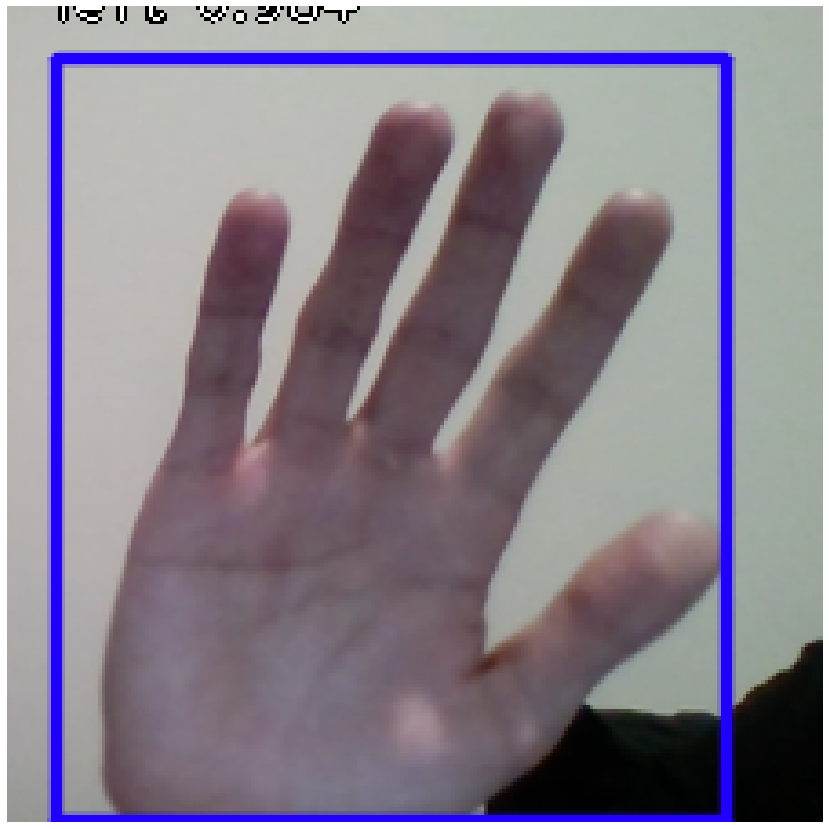

processing time:  0.229478120803833


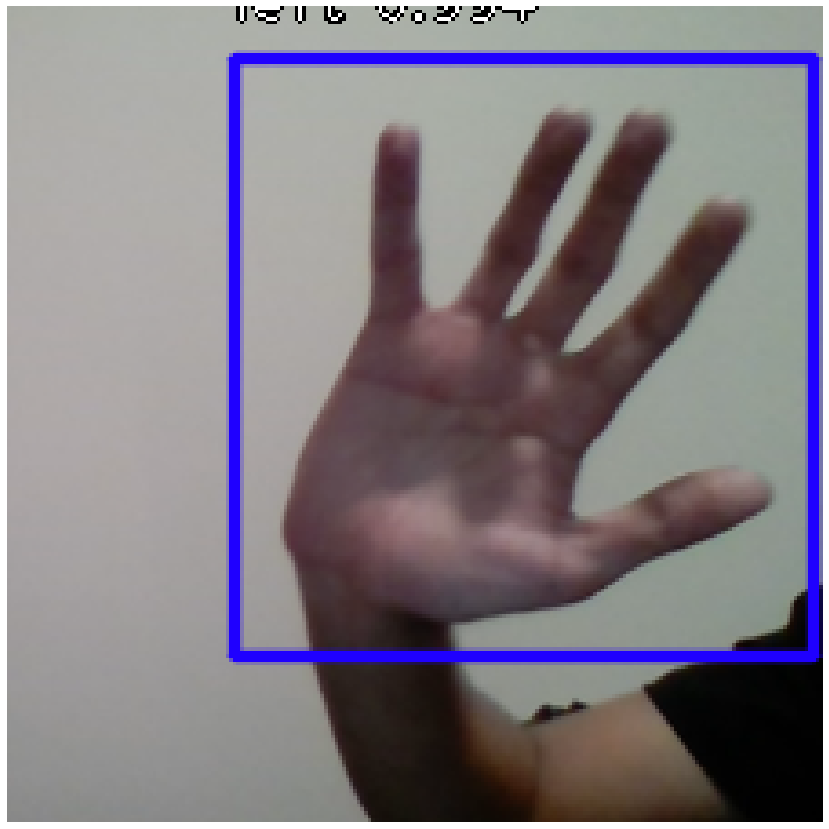

processing time:  0.24323010444641113


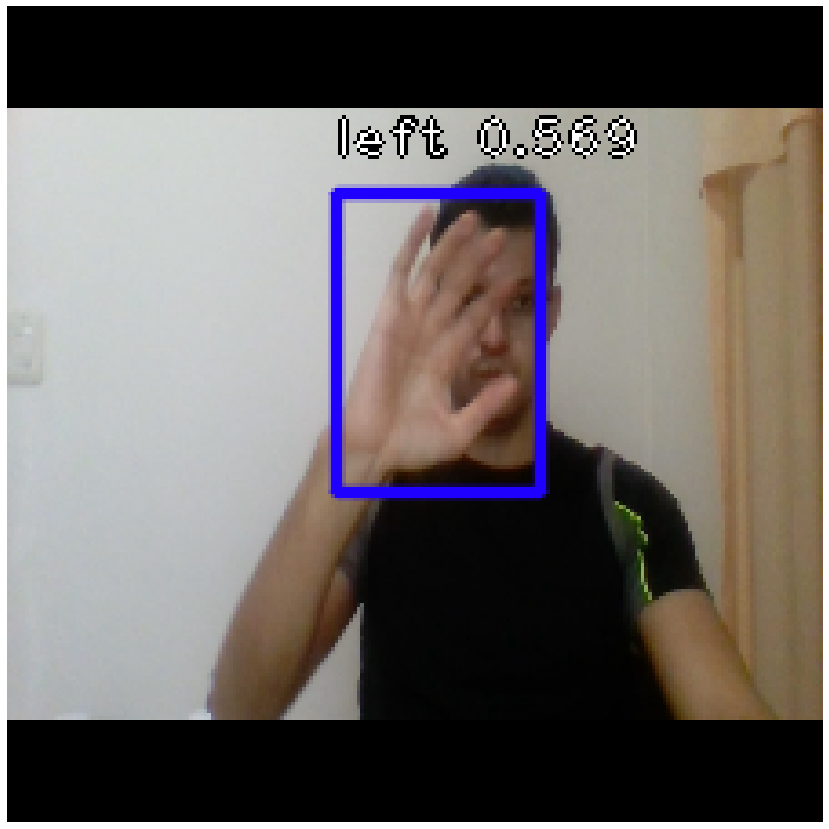

processing time:  0.23326992988586426


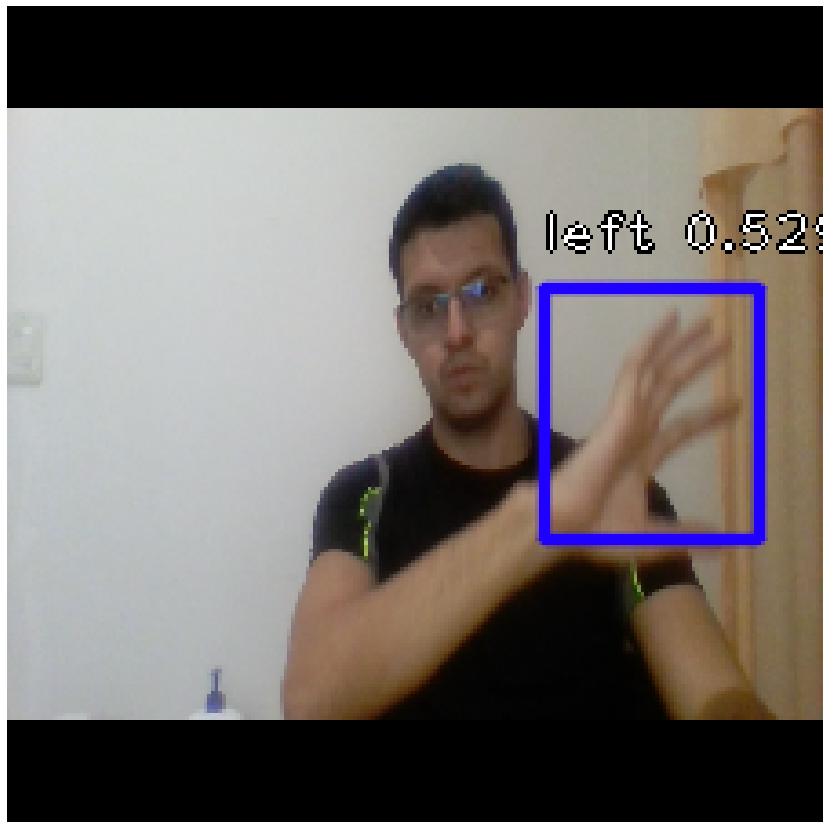

processing time:  0.22632408142089844


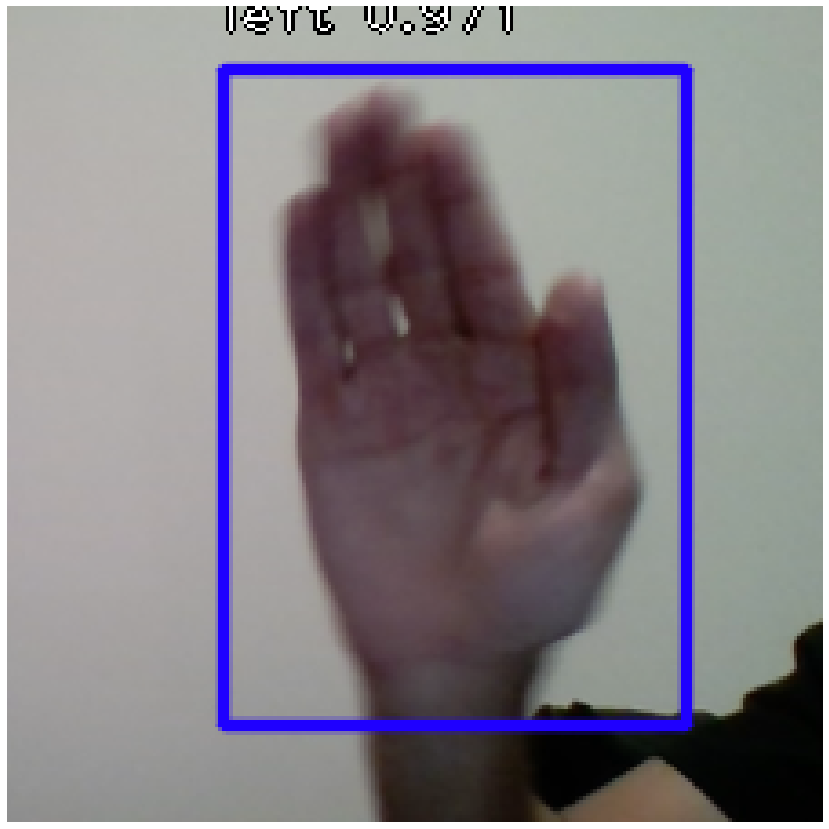

processing time:  0.21308279037475586


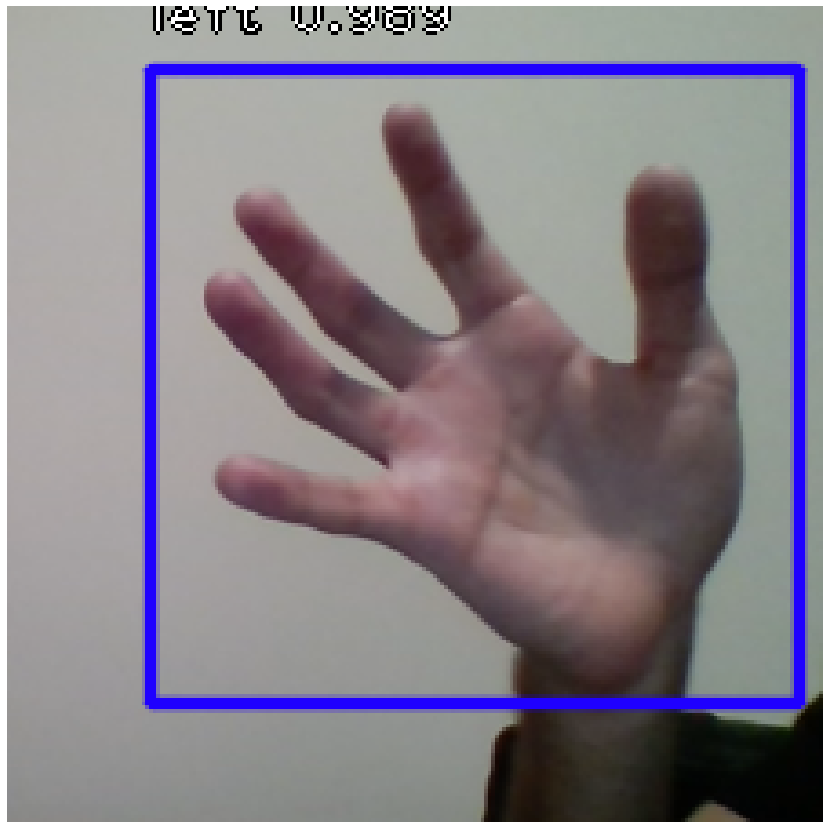

processing time:  0.22765493392944336


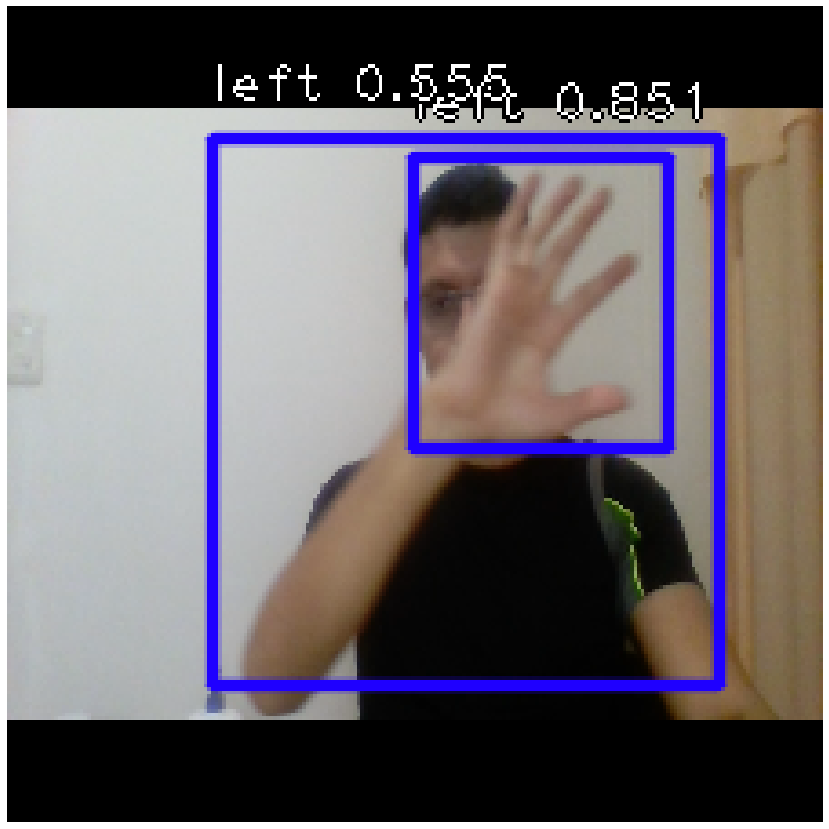

processing time:  0.22526884078979492


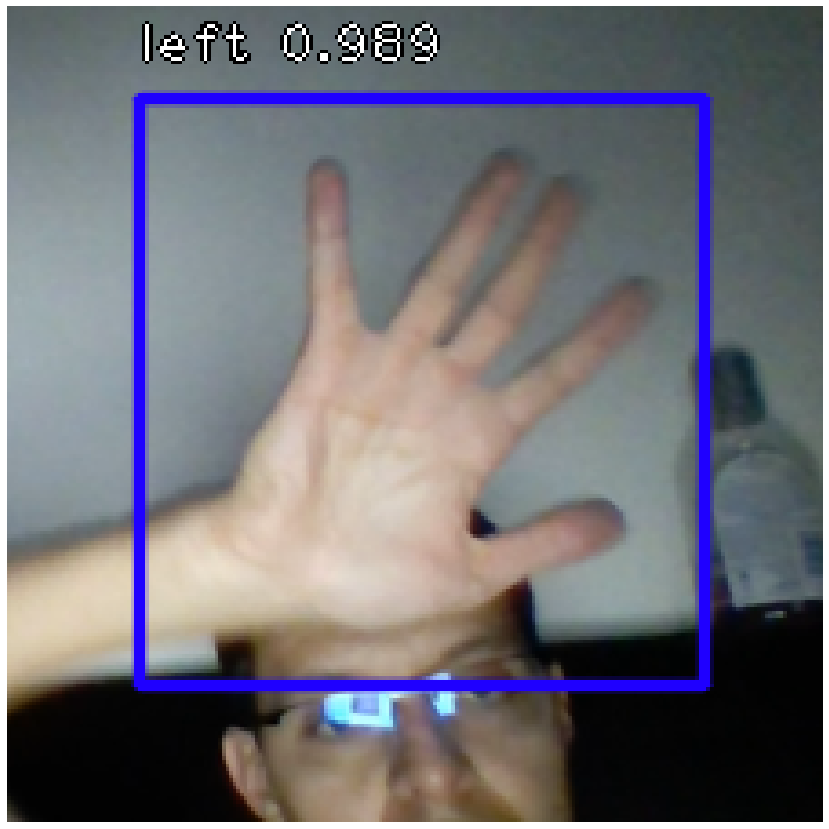

processing time:  0.2159407138824463


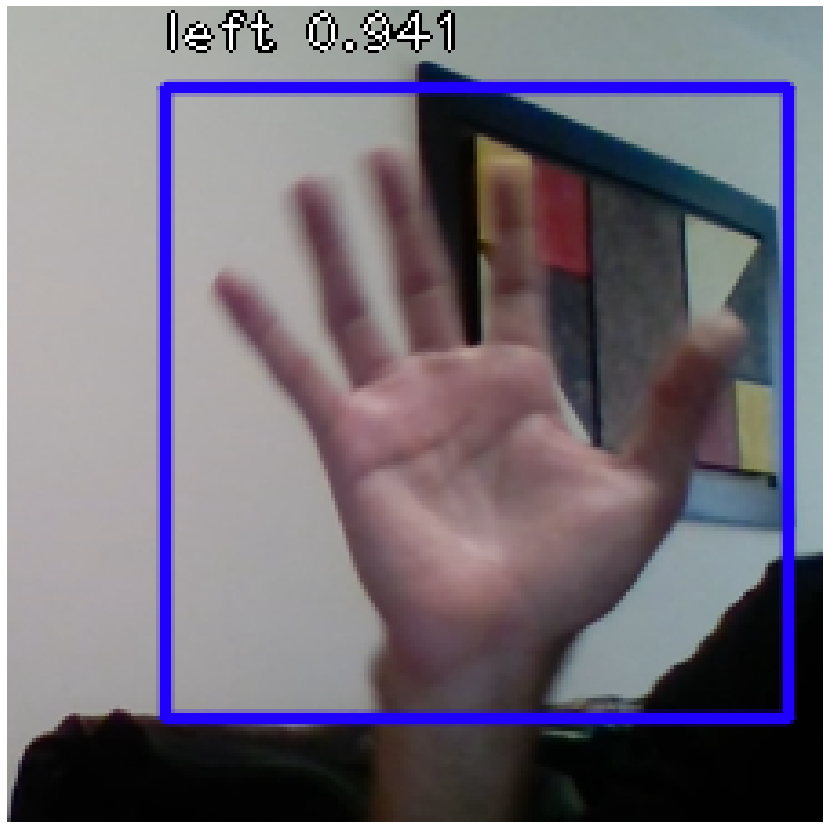

processing time:  0.2275390625


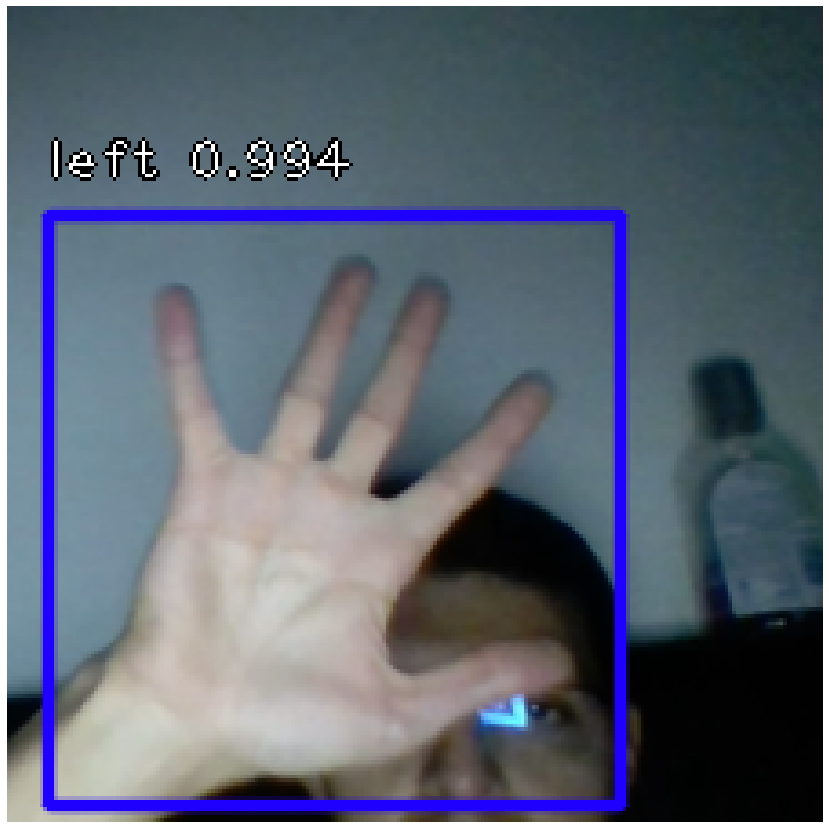

processing time:  0.21672987937927246


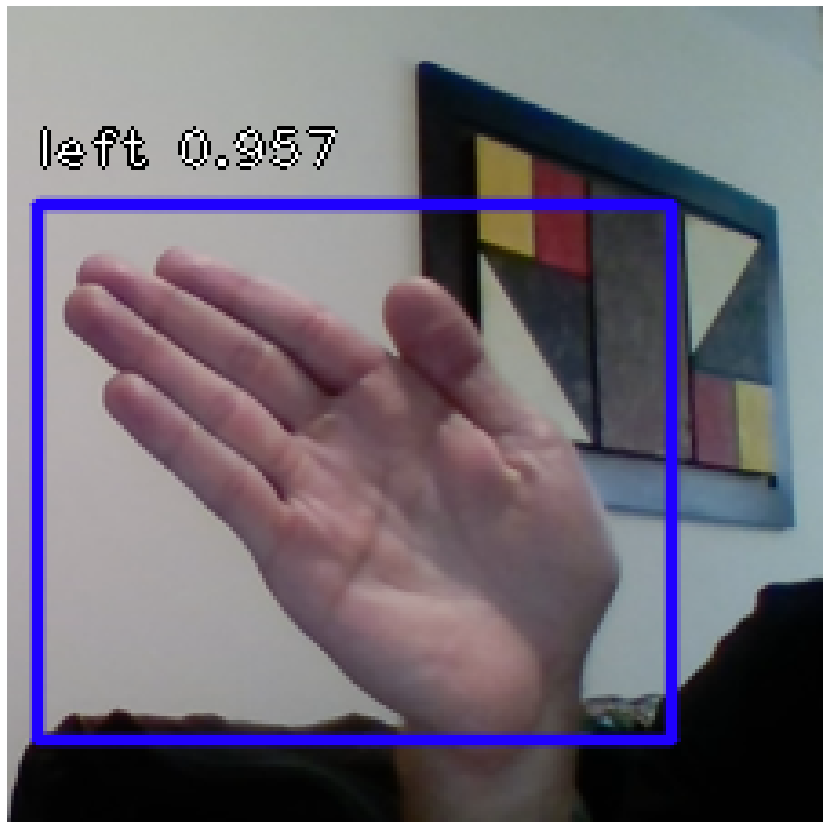

processing time:  0.21585297584533691


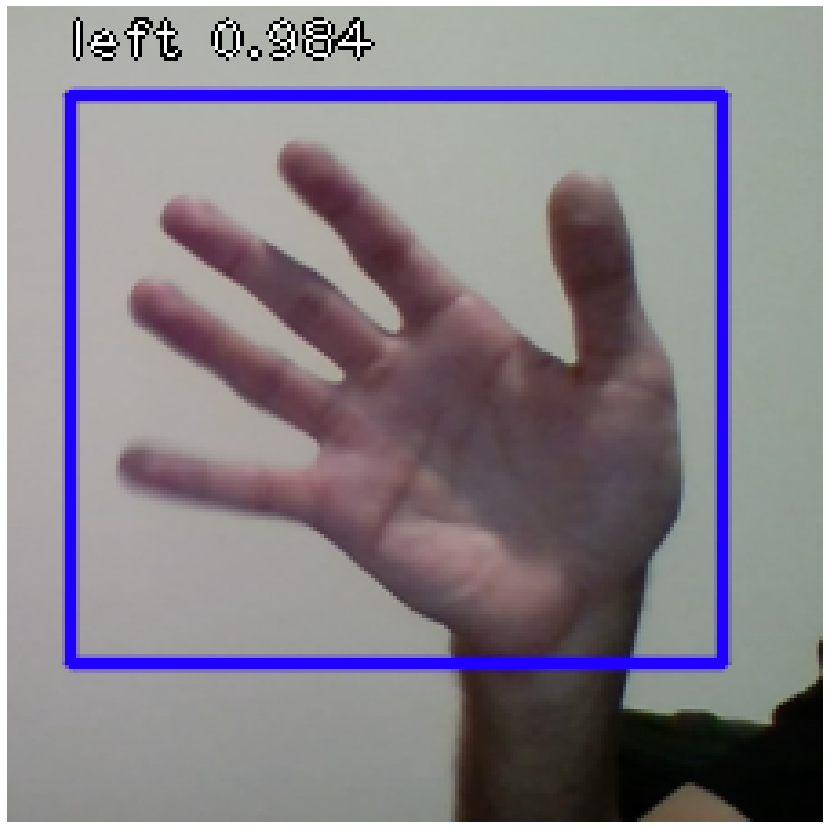

processing time:  0.22809696197509766


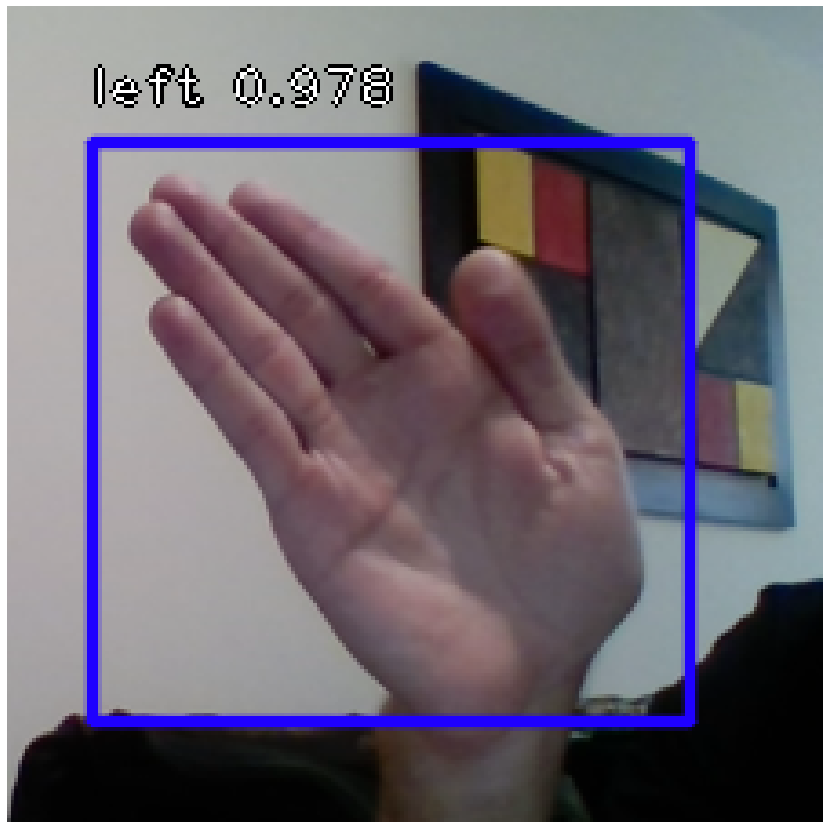

processing time:  0.20756101608276367


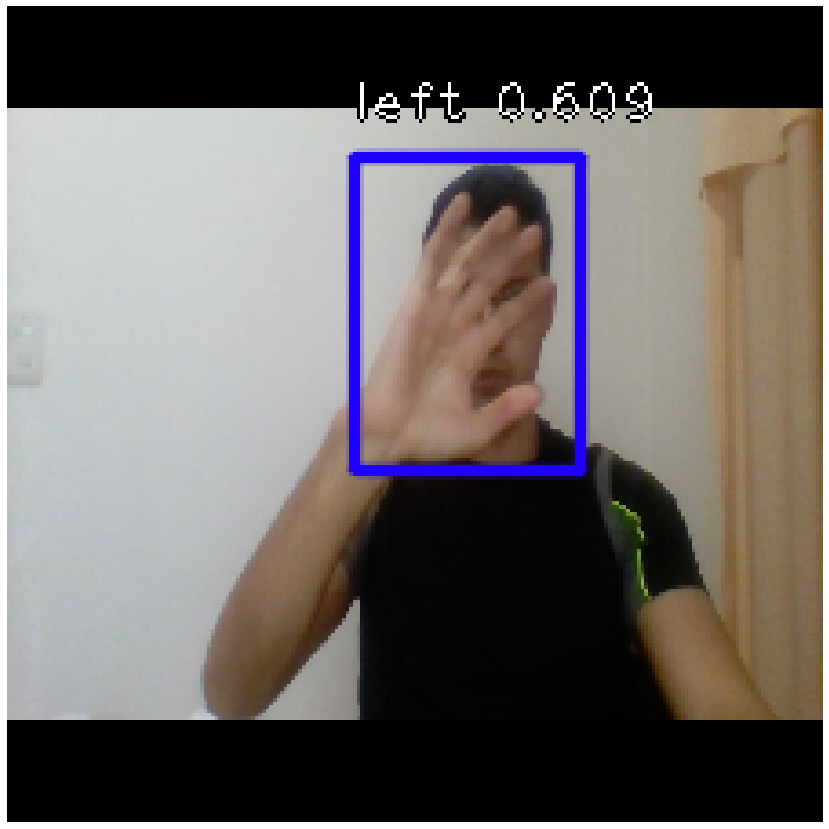

processing time:  0.2275710105895996


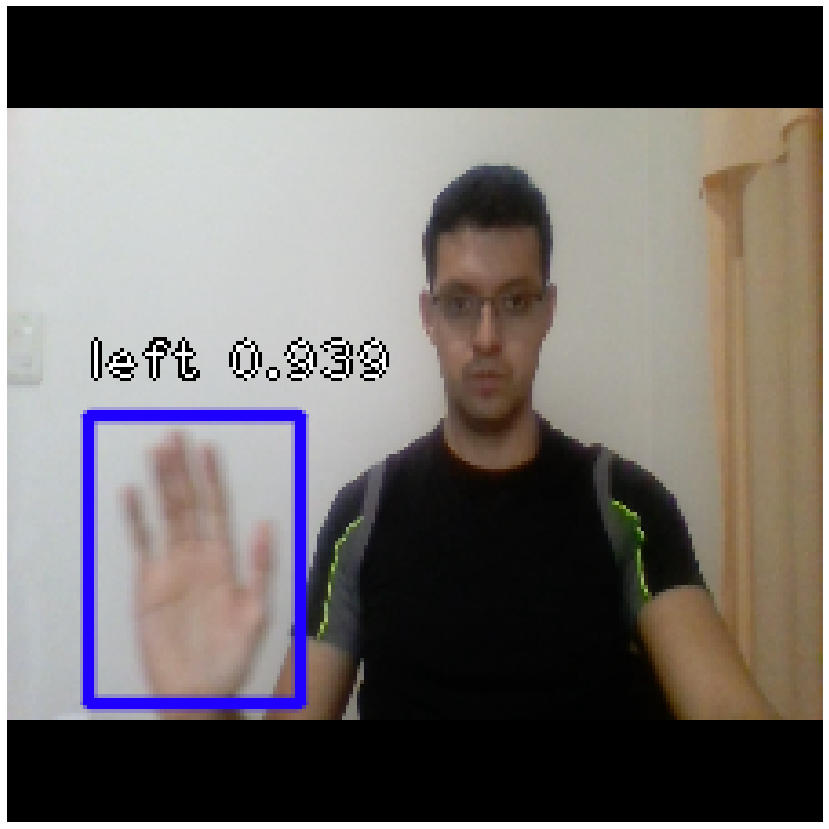

processing time:  0.22410917282104492


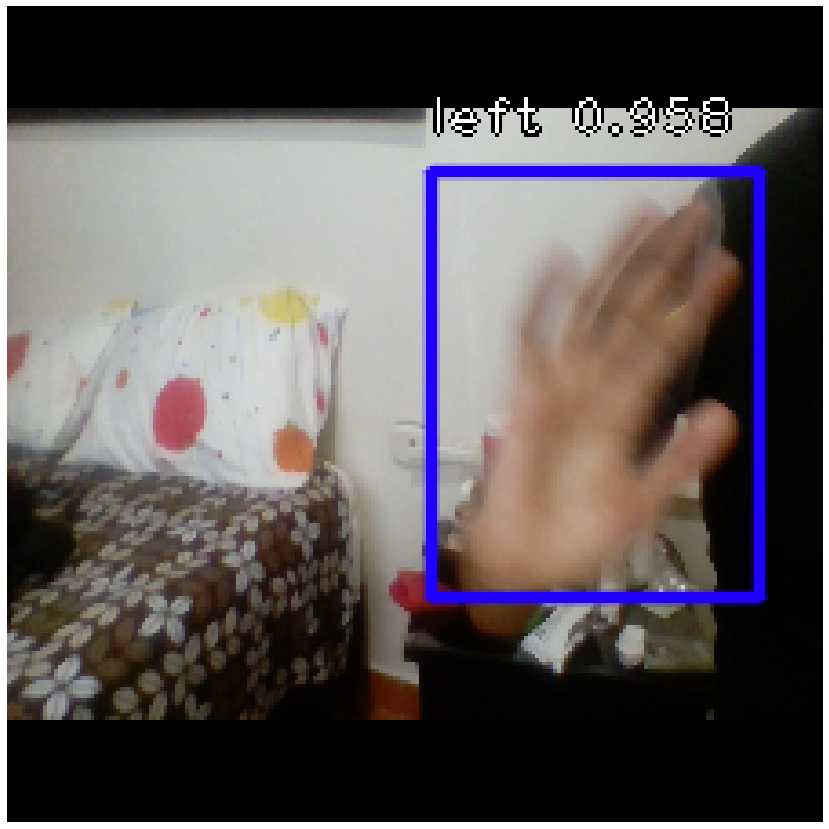

processing time:  0.22174882888793945


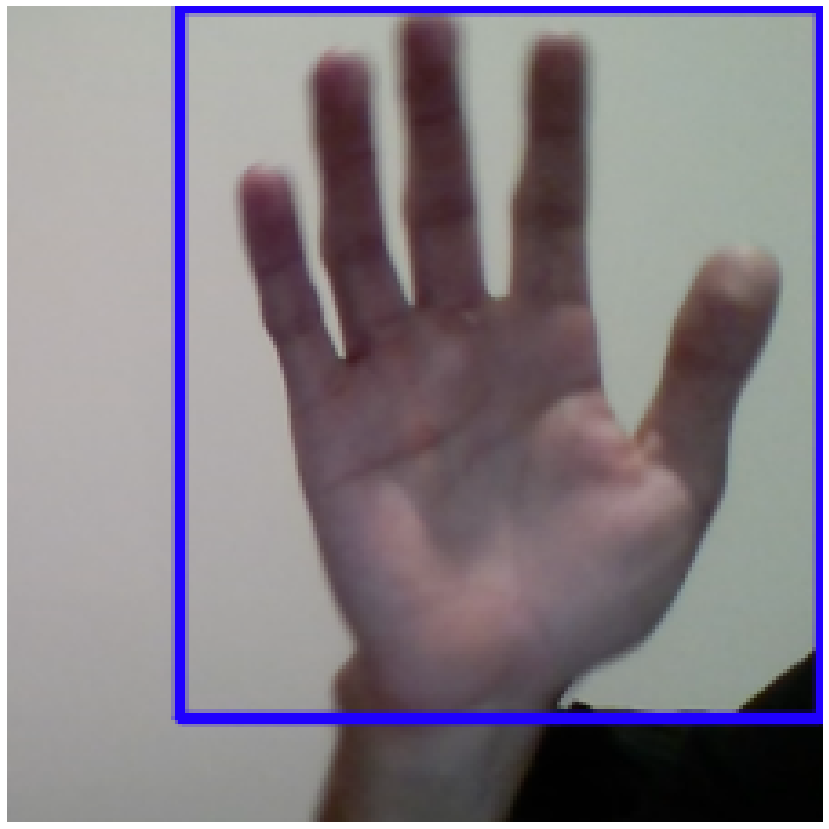

processing time:  0.2198948860168457


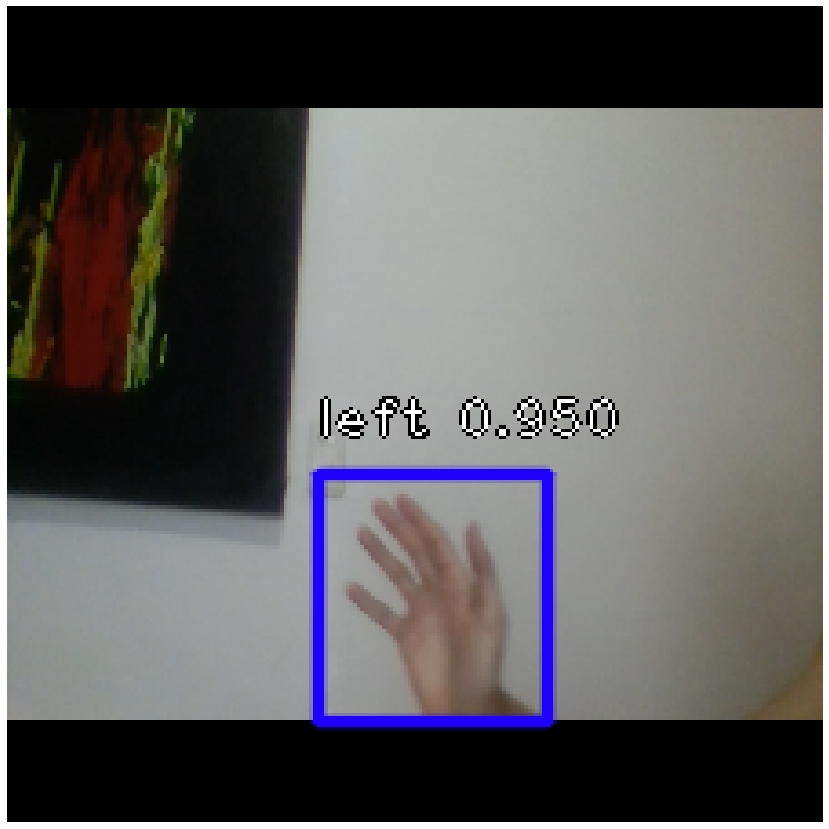

processing time:  0.2197279930114746


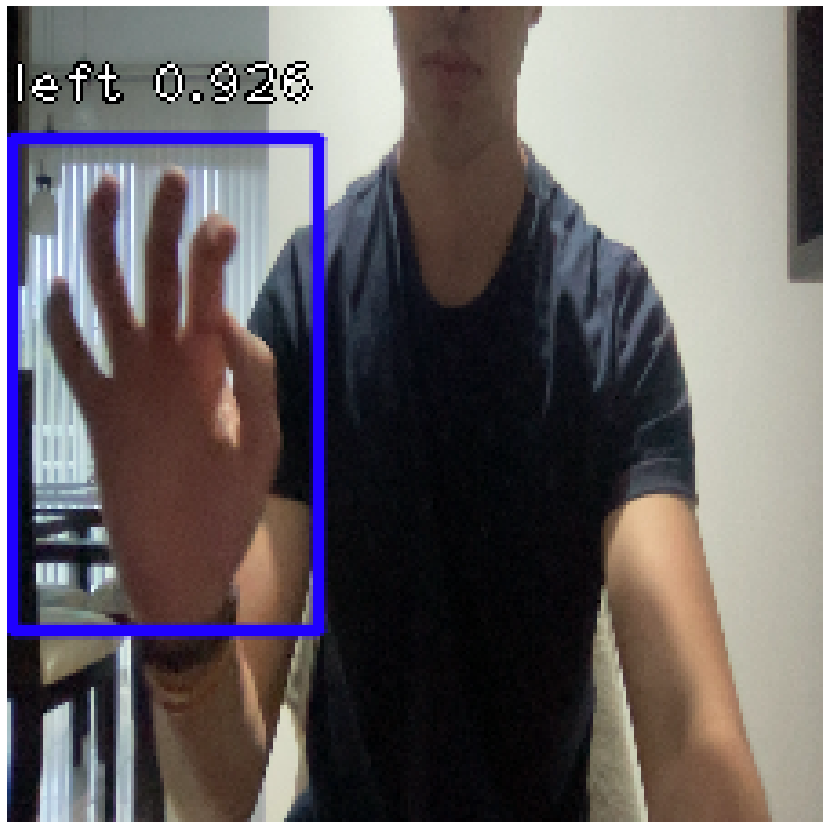

processing time:  0.22690320014953613


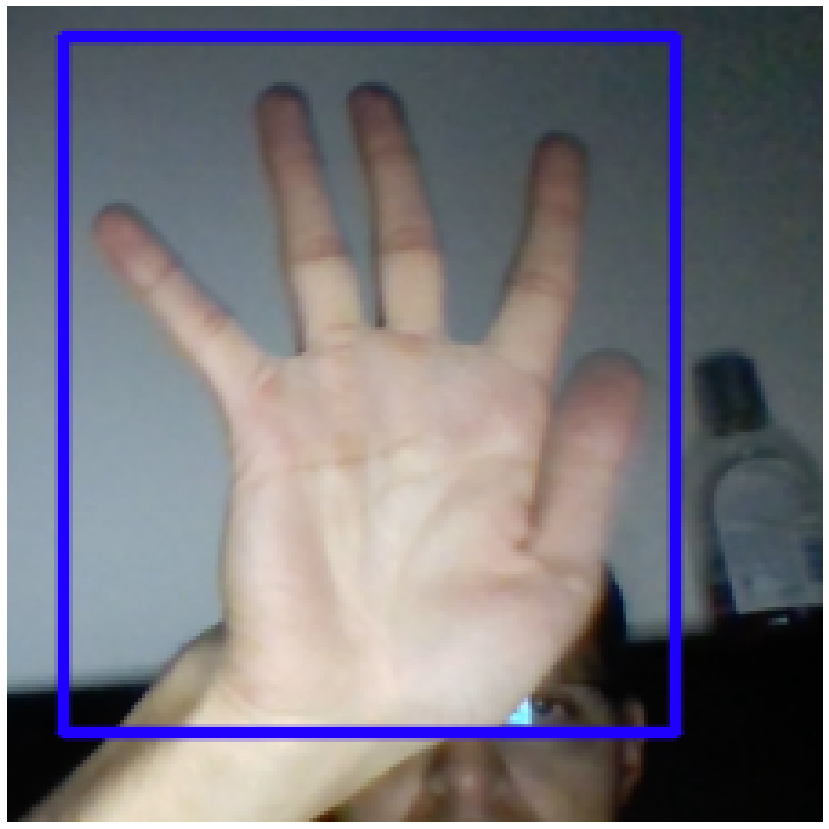

processing time:  0.2192699909210205


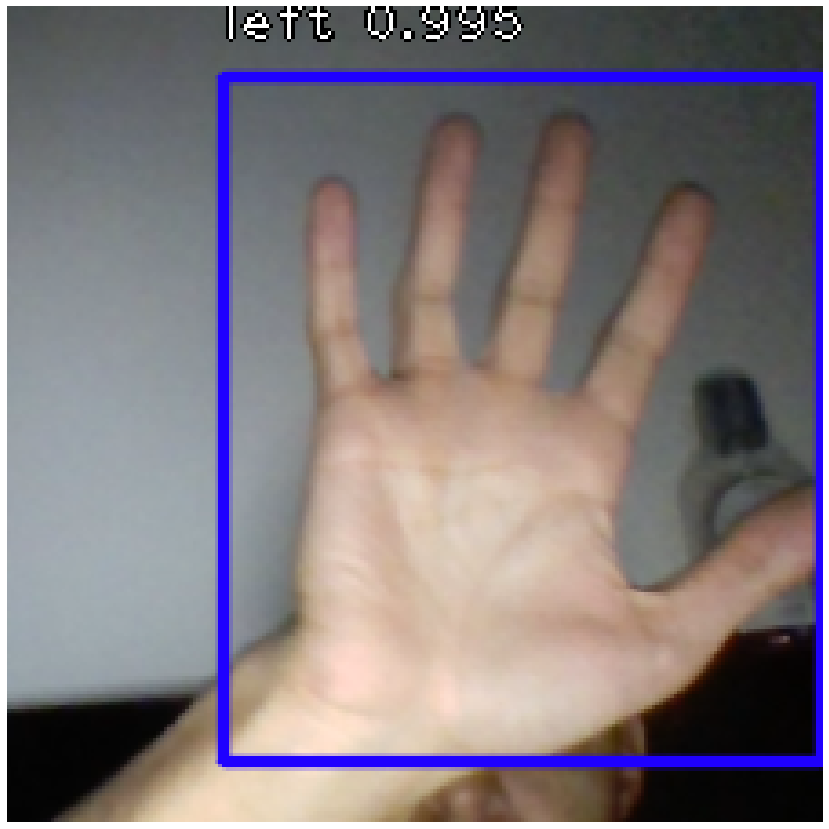

processing time:  0.21869897842407227


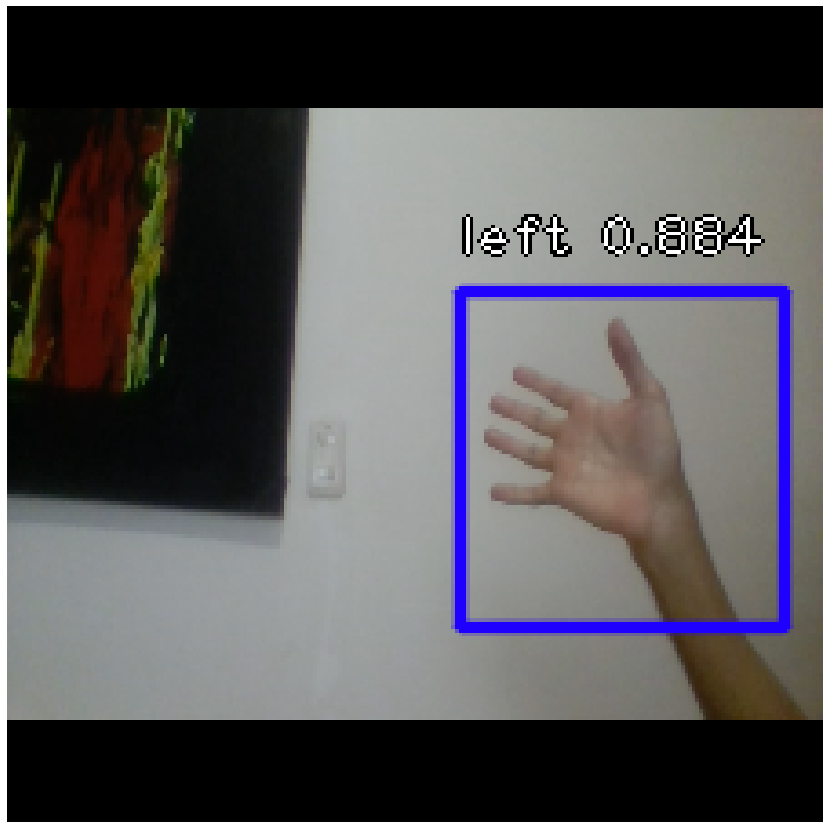

processing time:  0.21767497062683105


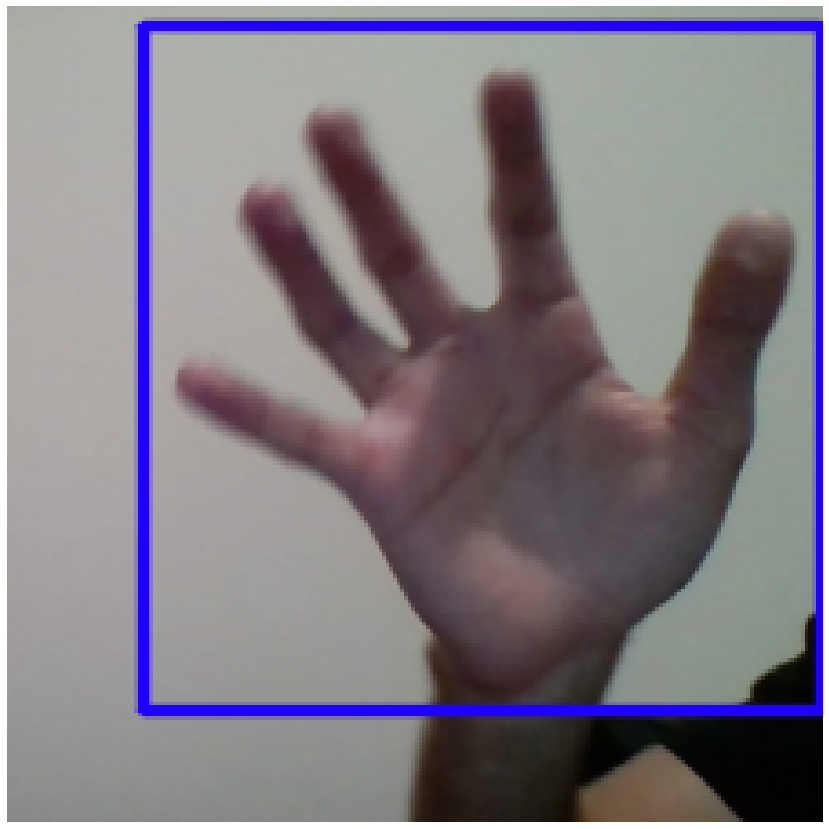

processing time:  0.21743321418762207


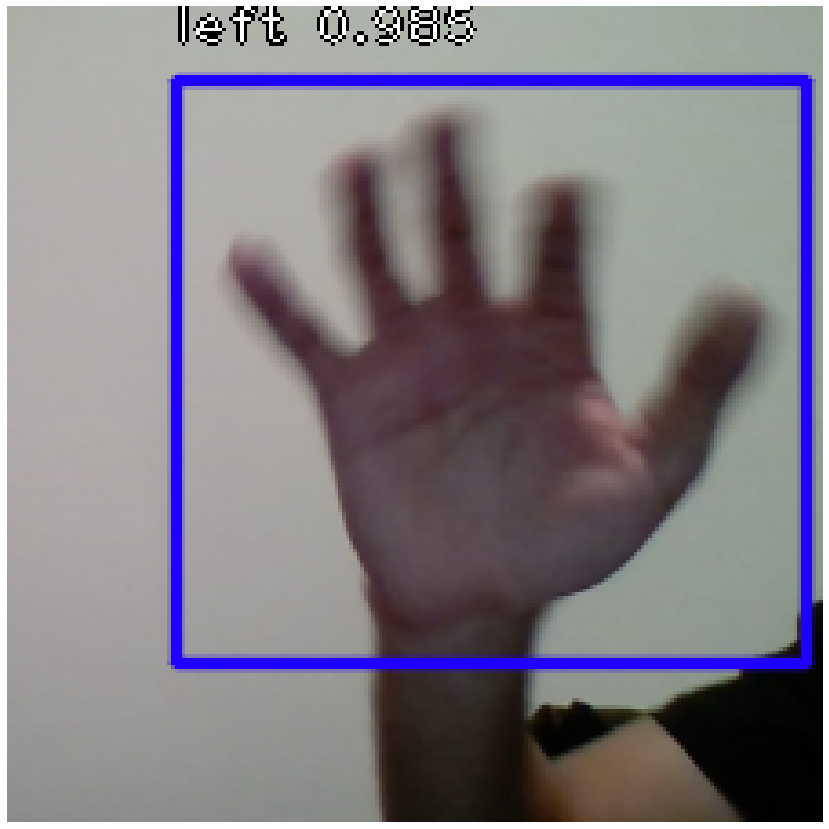

processing time:  0.21881699562072754


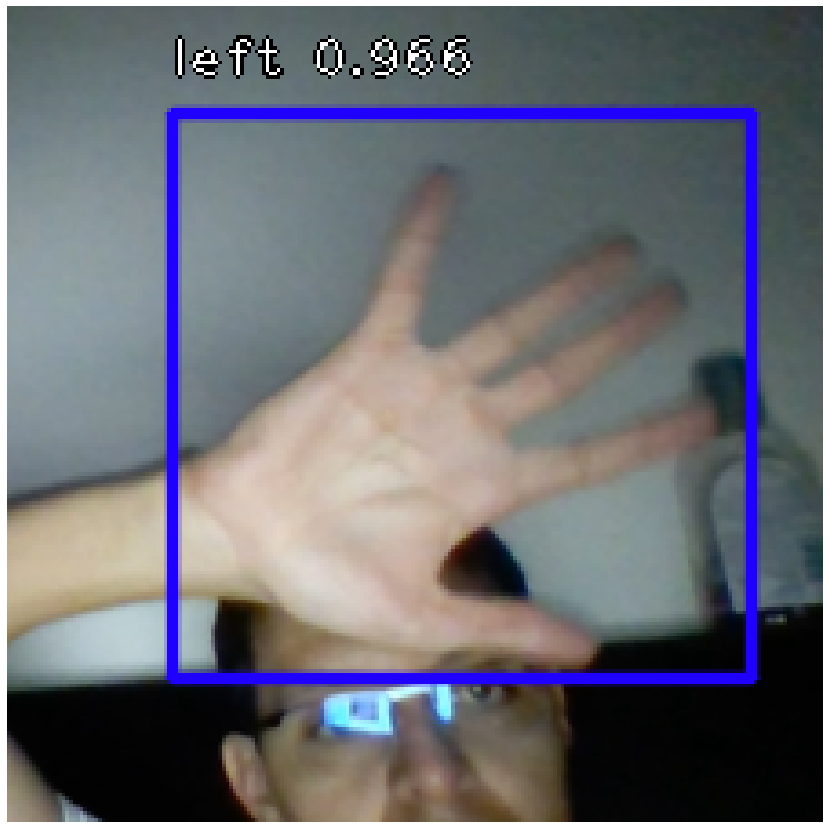

processing time:  0.22606325149536133


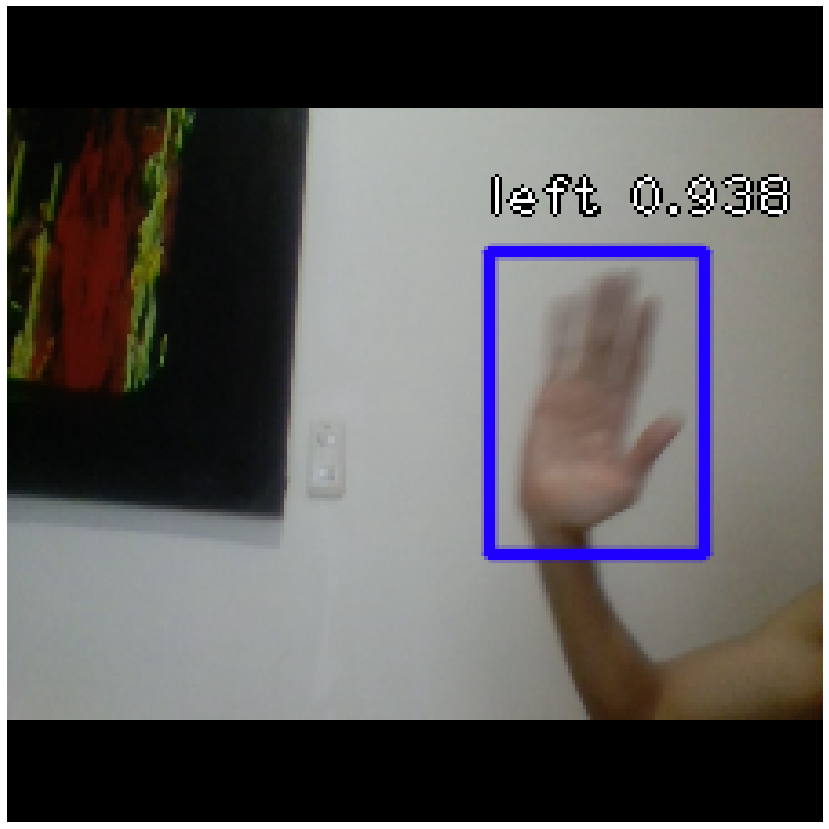

processing time:  0.2203218936920166


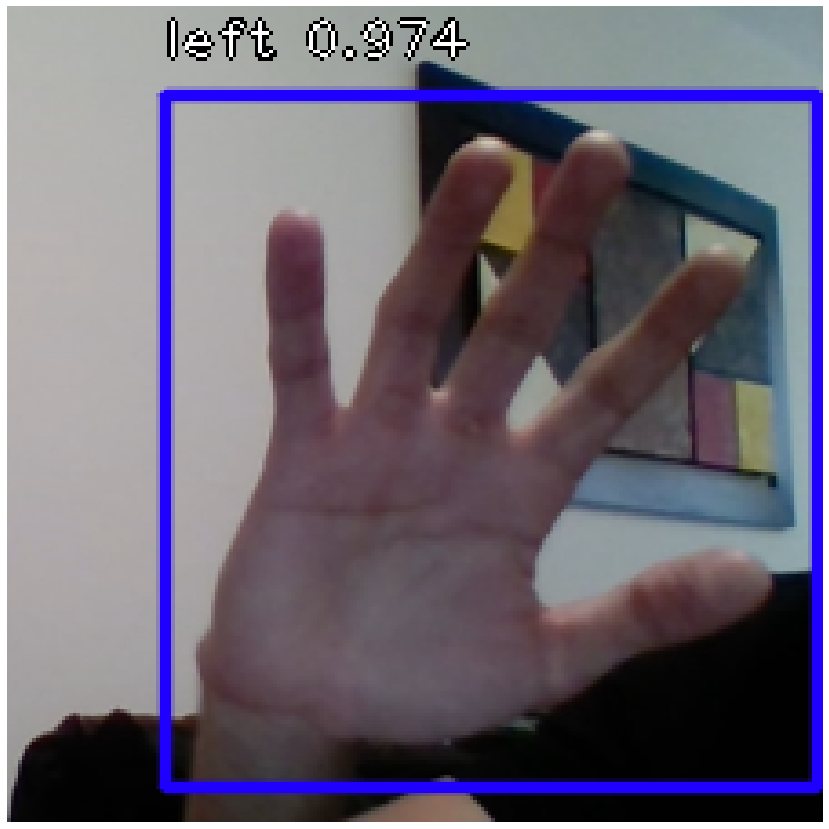

processing time:  0.22687530517578125


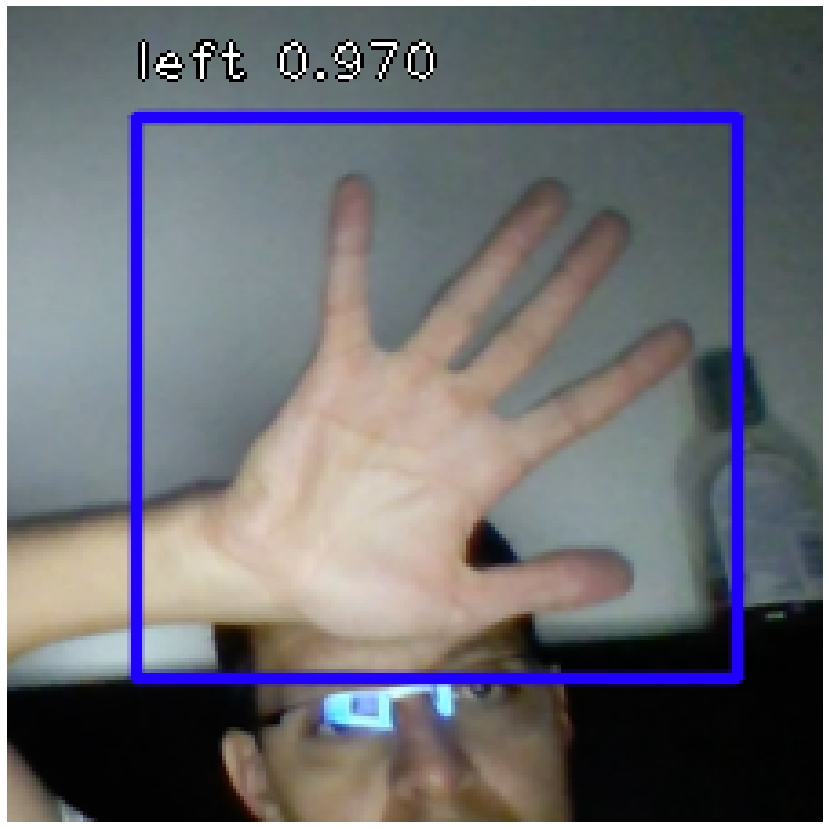

processing time:  0.22915029525756836


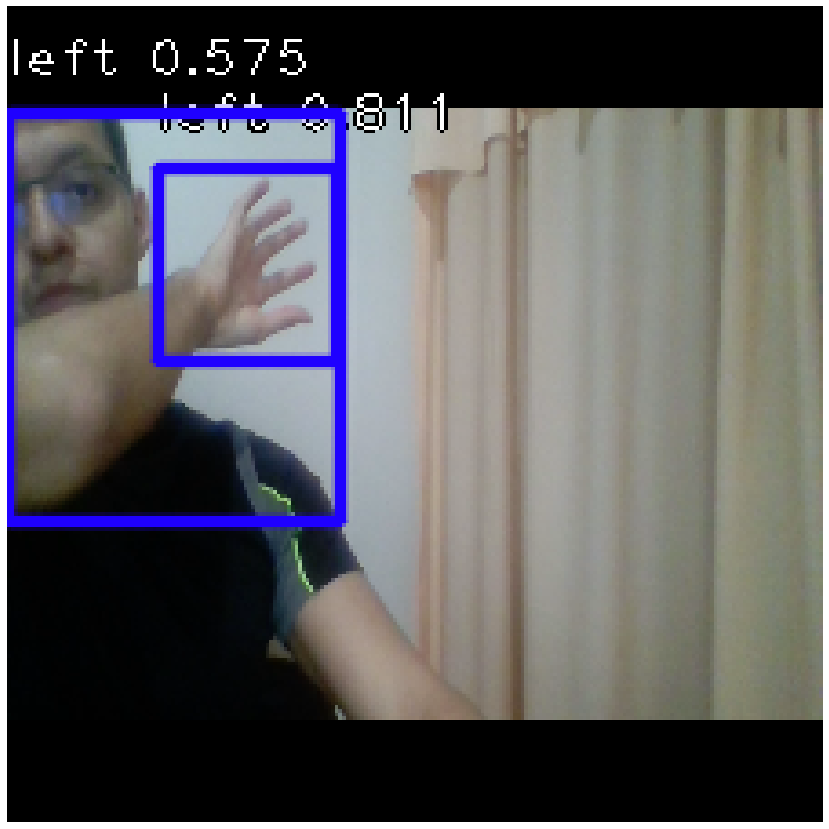

processing time:  0.2265458106994629


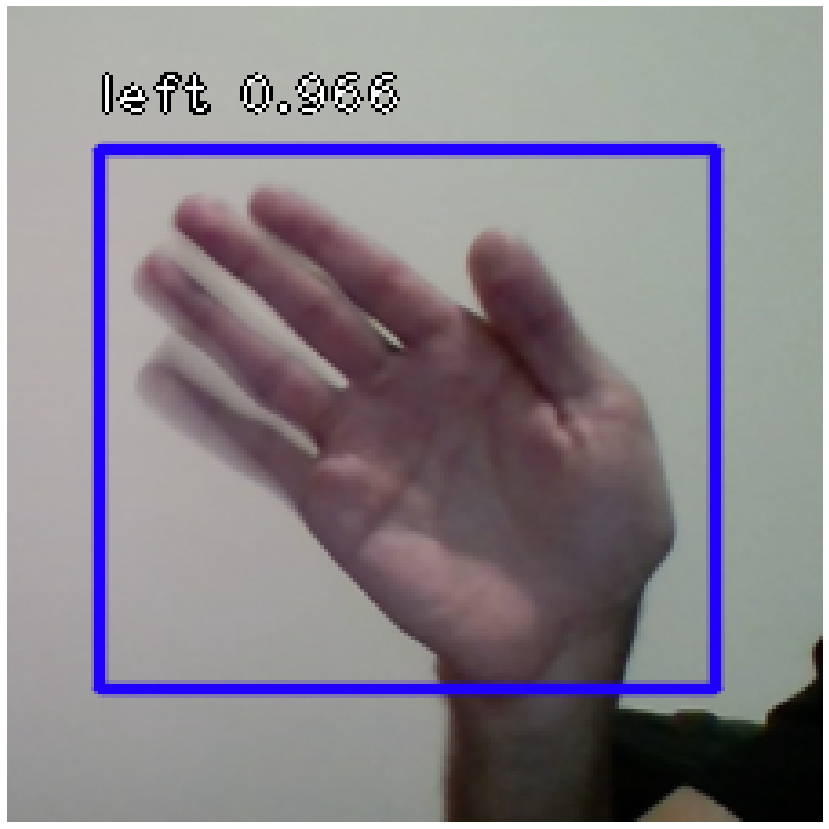

processing time:  0.22768831253051758


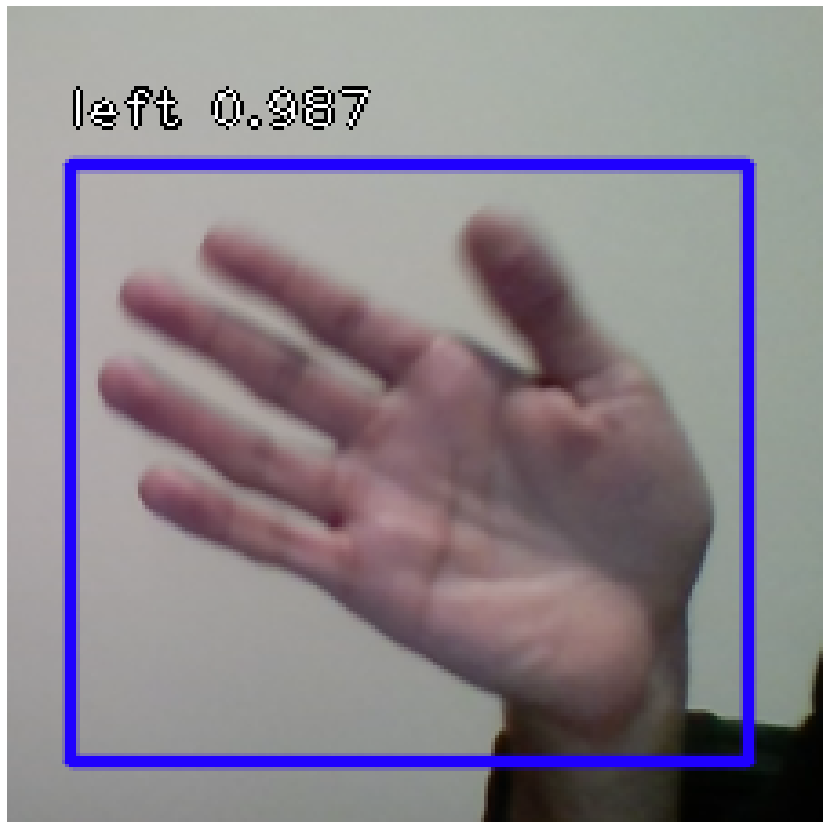

processing time:  0.21910595893859863


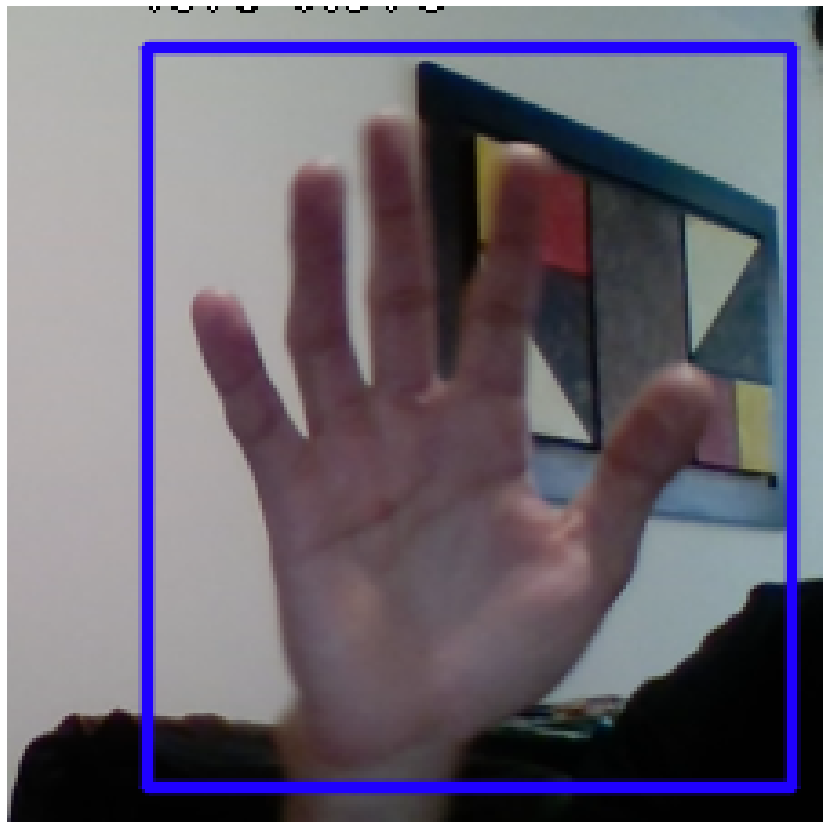

processing time:  0.22497320175170898


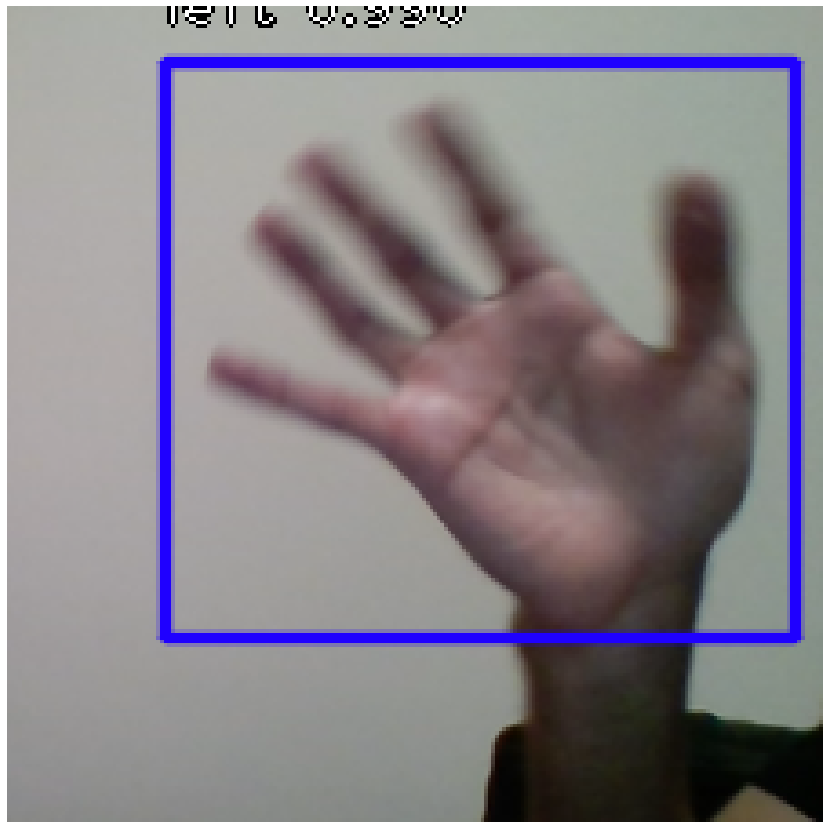

processing time:  0.21198081970214844


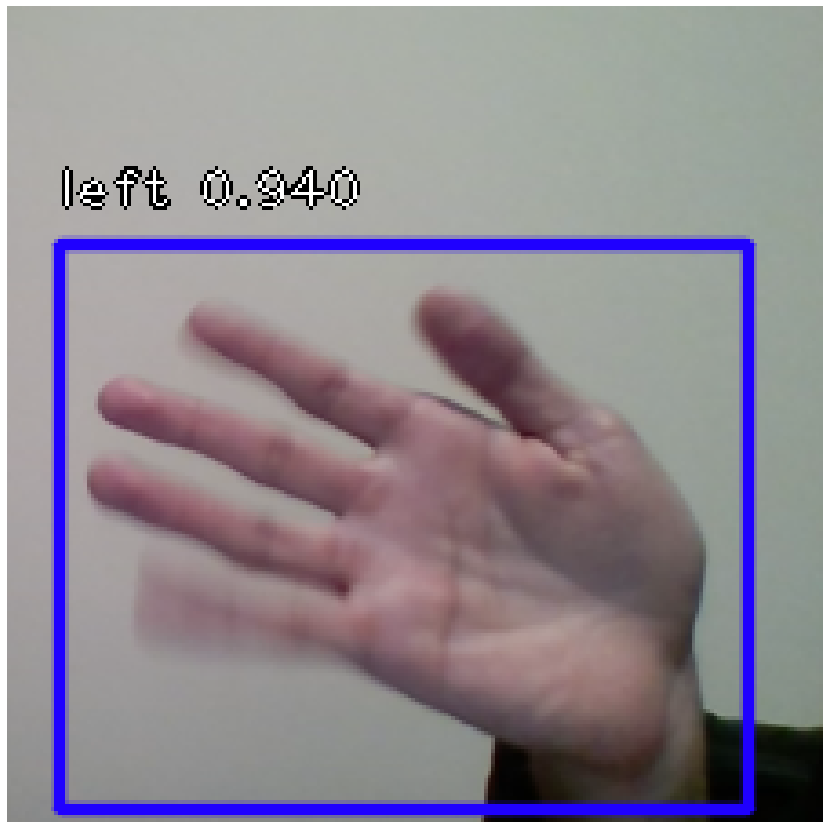

processing time:  0.2264089584350586


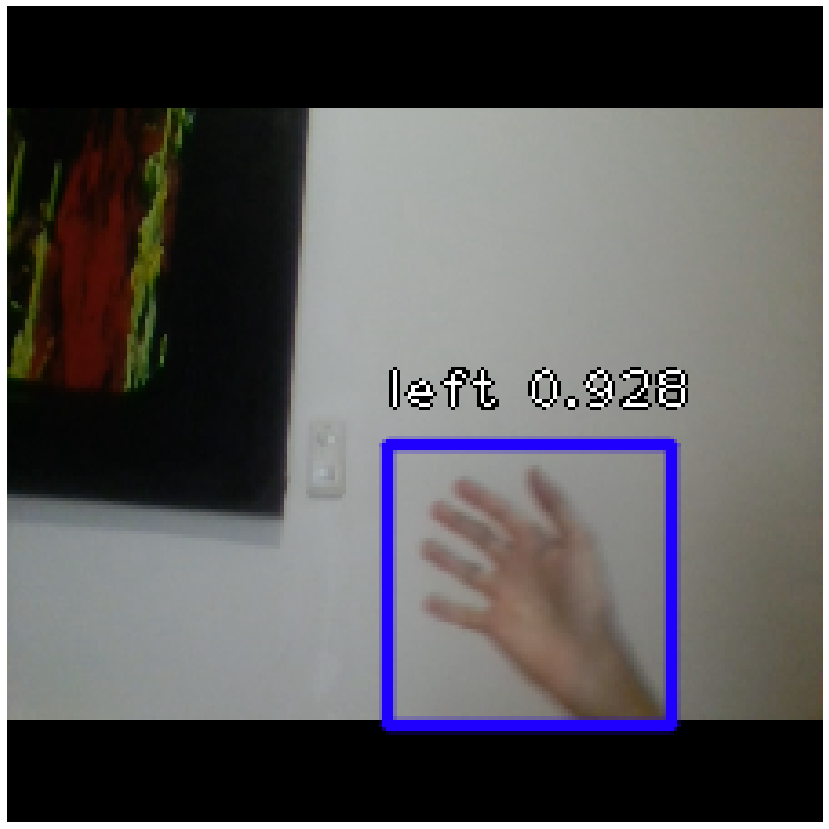

processing time:  0.20438385009765625


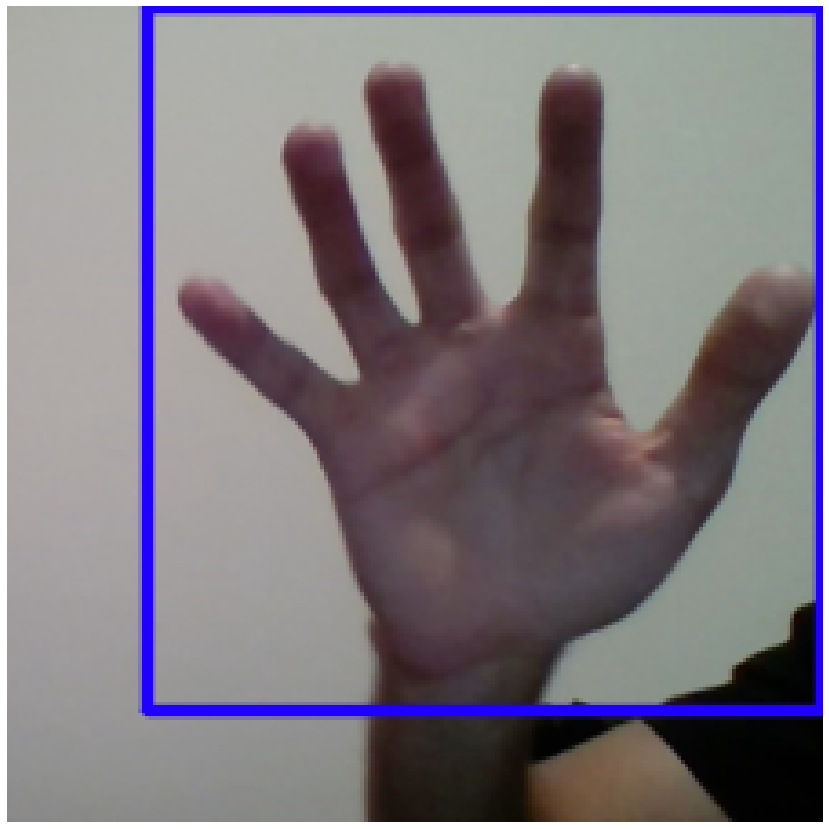

processing time:  0.22251296043395996


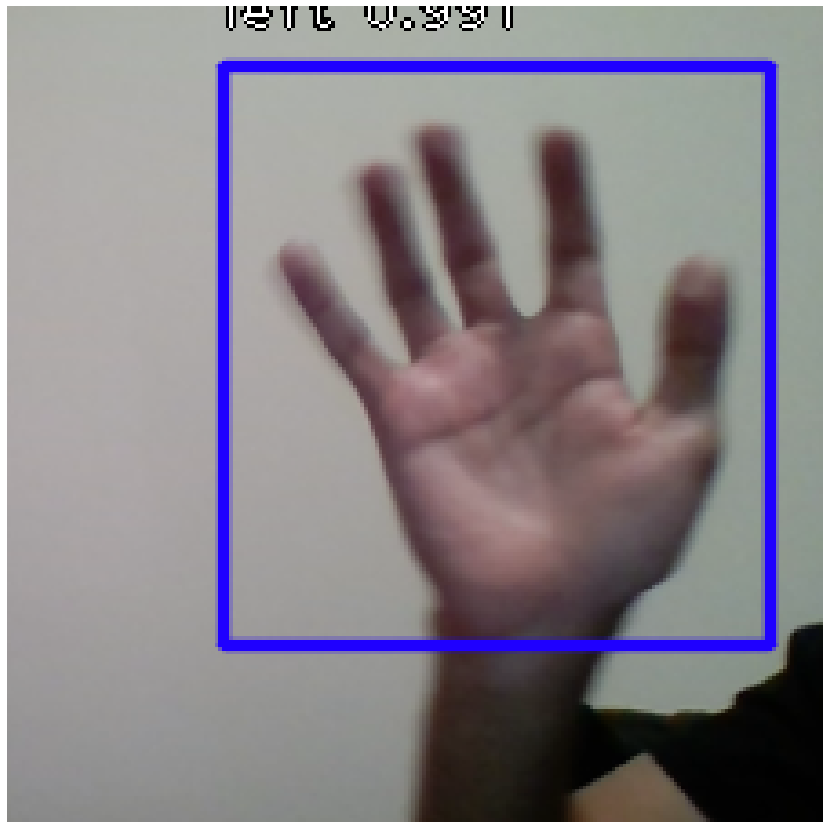

processing time:  0.21175003051757812


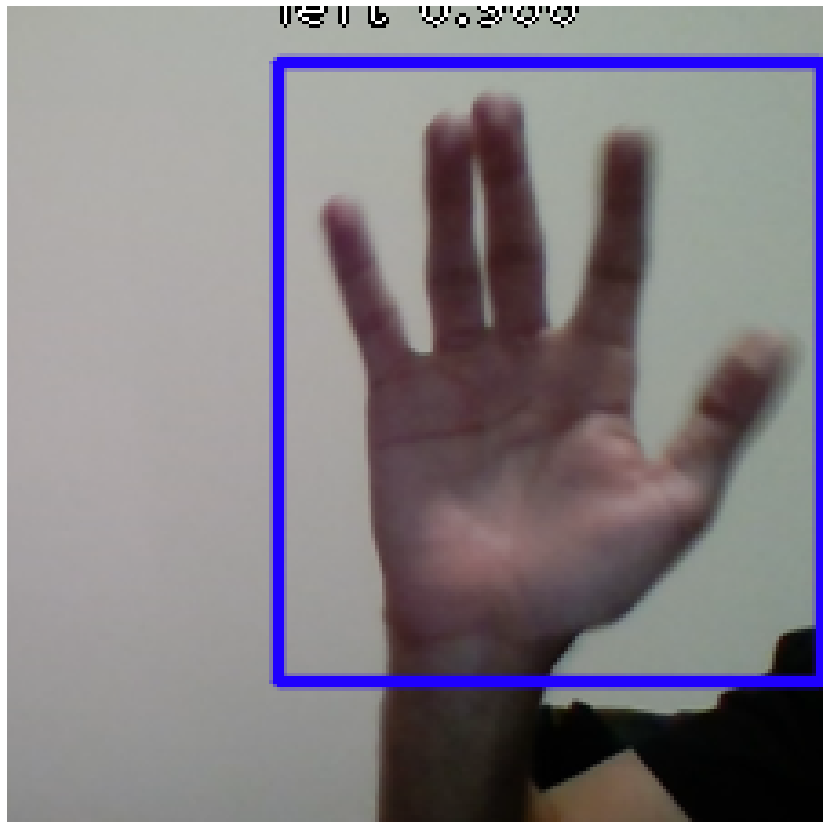

In [5]:
for image_name in test_df.iloc[:,0].to_list():
    # load image
    image = read_image_bgr(image_name)

    # copy to draw on
    draw = image.copy()
    draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

    # preprocess image for network
    image = preprocess_image(image)
    image, scale = resize_image(image)

    # process image
    start = time.time()
    try:
        boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))
        print("processing time: ", time.time() - start)
    except:
        continue
    # correct for image scale
    boxes /= scale

    # visualize detections
    for box, score, label in zip(boxes[0], scores[0], labels[0]):
        # scores are sorted so we can break
        if score < 0.5:
            break

        color = label_color(label)

        b = box.astype(int)
        draw_box(draw, b, color=color)

        caption = "{} {:.3f}".format(labels_to_names[label], score)
        draw_caption(draw, b, caption)

    plt.figure(figsize=(15, 15))
    plt.axis('off')
    plt.imshow(draw)
    plt.show()